## CHAPTER 6
# <h1><b> Decision Trees </b></h1> 

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks. They are
very powerful algorithms, capable of fitting complex datasets. For example, in Chapter
2 you trained a DecisionTreeRegressor model on the California housing dataset,
fitting it perfectly (actually overfitting it).

### Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1) ⚒️ Training and Visualizing a Decision Tree Classifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]  # petal length and petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded =True,
    filled = True
    
)

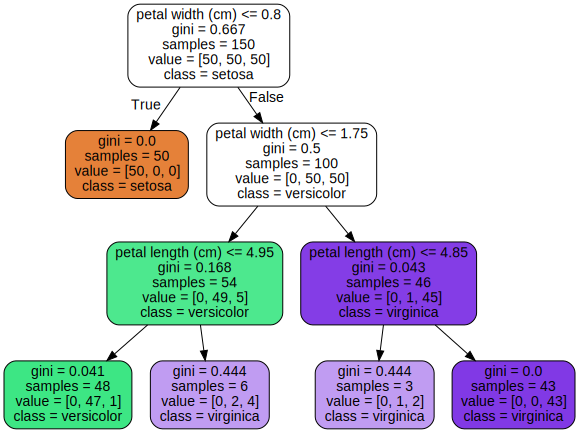

In [ ]:
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

>One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.

### Predictions and Probablity

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [ ]:
tree_clf.predict([[5, 2.5]]) # 2 for class 3, i.e. virginica

array([2])

# 2) Regularization Hyperparameters
The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.<br>
The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree: min_samples_split (the minimum number of samples
a node must have before it can be split), min_samples_leaf (the minimum number
of samples a leaf node must have), min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (maximum number of leaf nodes), and max_features
(maximum number of features that are evaluated for splitting at each node). Increasing
min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.

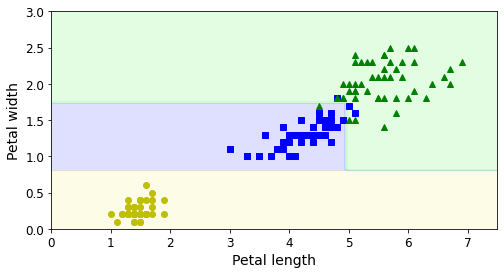

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  if plot_training:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
    plt.axis(axes)
  if iris:
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
  else:
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  if legend:
    plt.legend(loc="lower right", fontsize=14)  

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
# plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
# plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# 3) Decision Tree Regressor

In [ ]:
# generating data
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5) ** 2
y_reg = y_reg + np.random.randn(m, 1) / 10

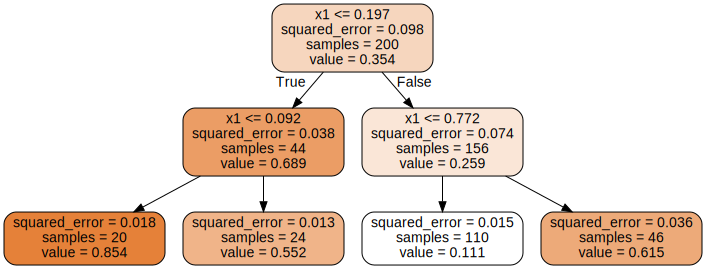

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_reg, y_reg)

export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "iris_reg_tree.dot"),
    feature_names = ["x1"],
    rounded =True,
    filled = True
    
)
Source.from_file(os.path.join(IMAGES_PATH, "iris_reg_tree.dot"))

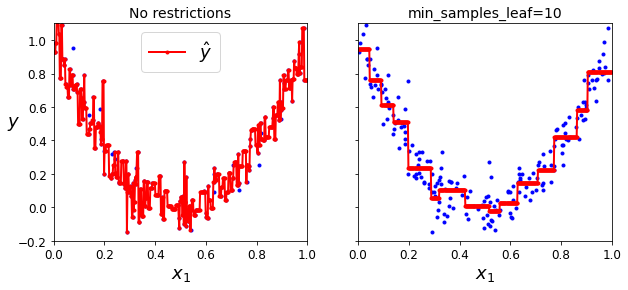

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_reg, y_reg)
tree_reg2.fit(X_reg, y_reg)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_reg, y_reg, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X_reg, y_reg, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


plt.show()


# 🤕 Lets try out an Exercise



7. **Train and fine-tune a Decision Tree for the moons dataset.**<br>
a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).<br>
b. Split it into a training set and a test set using train_test_split().

Generate moons dataset using make_moons()

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)


Spliting test and training data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

Use grid search with cross-validation (with the help of grid search ) to find good hyperparameter values for a DecisionTreeClassifier.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes':list(range(2, 100)), 'min_samples_split':[2, 3, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Accuracy: 86.95%


8. Grow a forest.<br>
a. Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use Scikit-
Learn’s ShuffleSplit class for this.<br>
b. Train one Decision Tree on each subset, using the best hyperparameter values
found above. Evaluate these 1,000 Decision Trees on the test set. Since they<br>
were trained on smaller sets, these Decision Trees will likely perform worse
than the first Decision Tree, achieving only about 80% accuracy.<br>
c. Now comes the magic. For each test set instance, generate the predictions of
the 1,000 Decision Trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This gives you majority-vote predictions
over the test set.<br>
d. Evaluate these predictions on the test set: you should obtain a slightly higher
accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
you have trained a Random Forest classifier!

In [ ]:

from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets=[]

rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances, random_state=42)
for mini_train_index, _ in rs.split(X_train):
  X_mini_train = X_train[mini_train_index]
  y_mini_train = y_train[mini_train_index]
  mini_sets.append((X_mini_train, y_mini_train))


In [ ]:
from sklearn.base import clone

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores=[]

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
  tree.fit(X_mini_train, y_mini_train)

  y_pred = tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

In [ ]:
y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
  y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode
y_pred_mojority, n_votes = mode(y_pred, axis=0)

In [ ]:
accuracy_score(y_test, y_pred_mojority.reshape(-1, 1))

0.872

>#   🤪🏖️...Complete...🥴😵‍💫 😘😡

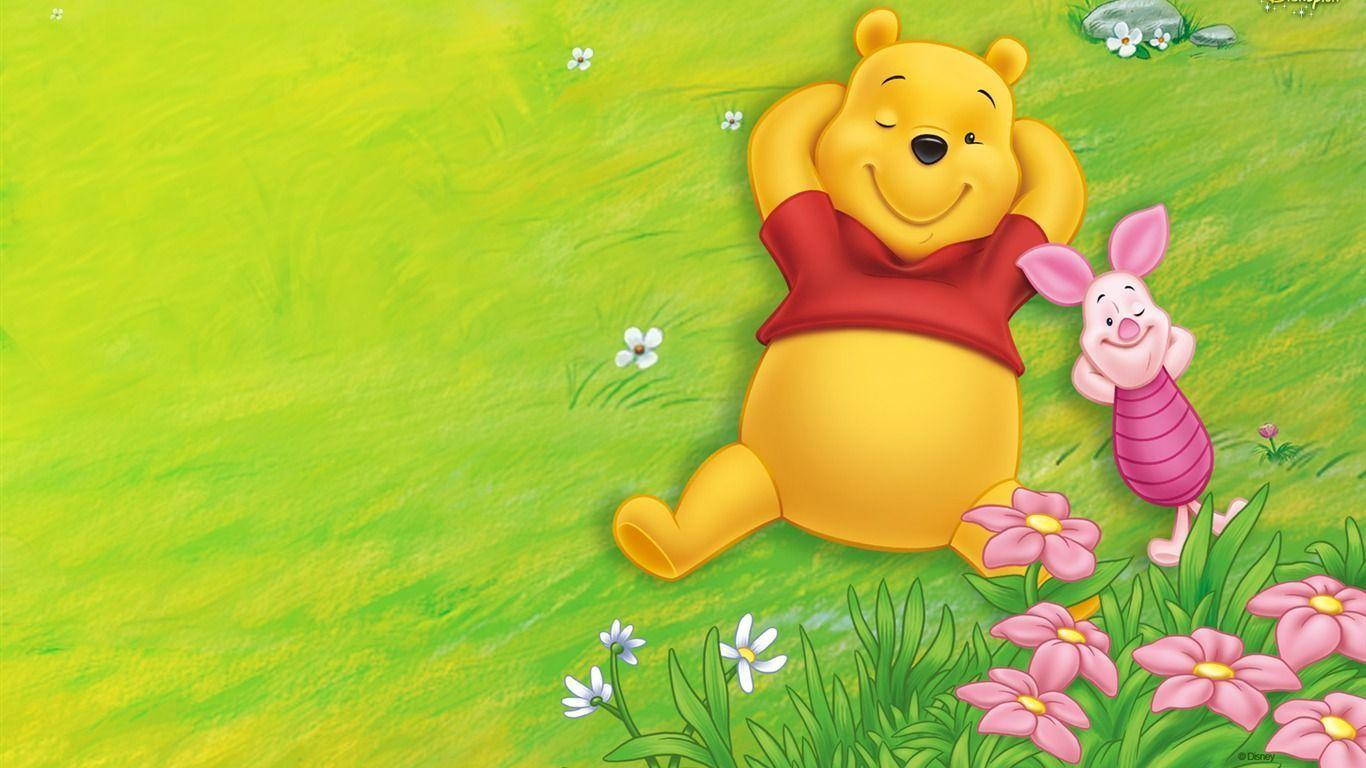